<font size=7> Social distancing: evidence of privilege in a pandemic from smartphones </font><br>
Nabarun Dasgupta, MPH, PhD | nab@unc.edu | @nabarund<br>
*Dr. Dasgupta is an epidemiologist at the University of North Carolina in Chapel Hill. He studies population level patterns of infectious disease, medication safety, and opioids.*<br>
Thanks to Ben White for data munging help. Code available on [GitHub](https://github.com/opioiddatalab/covid).

In [220]:
display "Notebook generated on $S_DATE at $S_TIME ET"

Notebook generated on 16 Apr 2020 at 00:28:58 ET


On March 23, 2020 Stuart Thompson and Yaryna Serkez of *The New York Times* [published](https://www.nytimes.com/interactive/2020/03/23/opinion/coronavirus-economy-recession.html) a fascinating use of cell phone GPS signal information to gauge movement and commuting, during the advent of social distancing. They compared the state-level data in a [slick graphic](https://www.nytimes.com/interactive/2020/03/23/opinion/coronavirus-economy-recession.html) to political leanings. But we wanted to understand more about other community level characteristics of slow versus fast adopters.<br>
<br>
We were provided access to the same location dataset on social distancing published today in the. We used a data merging approach we have [previously published](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6339867/). Repurposing code from an ongoing project, we merged in community-level data from the Robert Wood Johnson Foundation's [County Health Rankings](https://www.countyhealthrankings.org/). This very rich dataset contains dozens of explanatory variables about health, social, and economic indicators.<br>


In [221]:
// Load pre-procesed data
clear all
set scheme economist
use "https://github.com/opioiddatalab/covid/blob/master/analysiset.dta?raw=true"

// Basic distributions of 
tab rucc, m
tab iso5, m
table iso5, c(sum last3_sample)
su last3_sample
di "Total 3-day mobile traces: " r(sum)

// Set up reporting output programs 
program define pdiff
    version 16
    qui: lincom (levels5-levels1), ef
    local d=r(estimate)
    local se=r(se)
    di "Percent difference (high-low): " round(((`d'-1)*100),.1) "% (95% CI: " round((((`d'-1)*100)-(1.96*`se')),.1) "%, " round((((`d'-1)*100)+(1.96*`se')),.1) "%)"
end

// Create results frame
frame create results str20 strat level avg LL UL

// Set up program for main models
program define modelrun, rclass
    version 16
    syntax varlist(numeric)
    
    frame change default
    foreach var of local varlist {
    * Tabular
        qui: tabulate iso5, generate(levels)
        *table iso5, c(count pcp_rate mean pcp_rate sem pcp_rate) 
    * Base model
        glm `var' levels*, family(poisson) link(log) scale(x2) nocons eform 
    * Rurality-adjusted model for graphs
        glm `var' levels* i.rucc, family(poisson) link(log) scale(x2) eform nocons
        
        * Store results
        frame post results ("`var'") (1) (round((r(table)[1,1]),.1)) (round((r(table)[5,1]),.1)) (round((r(table)[6,1]),.1))
        frame post results ("`var'") (2) (round((r(table)[1,2]),.1)) (round((r(table)[5,2]),.1)) (round((r(table)[6,2]),.1))
        frame post results ("`var'") (3) (round((r(table)[1,3]),.1)) (round((r(table)[5,3]),.1)) (round((r(table)[6,3]),.1))
        frame post results ("`var'") (4) (round((r(table)[1,4]),.1)) (round((r(table)[5,4]),.1)) (round((r(table)[6,4]),.1))
        frame post results ("`var'") (5) (round((r(table)[1,5]),.1)) (round((r(table)[5,5]),.1)) (round((r(table)[6,5]),.1))

   * Percent difference between highest and lowest mobility tiers
        pdiff
        drop levels*
 
   * Plot graph
       frame change results
       la var level "Social Distancing: Lowest (1) to Highest (5)"
       line avg level if inlist(strat,"`var'")
       
    * Rate ratio of top 20% compared to bottom 80% of social distancing
        frame change default
         glm `var' toptier i.rucc, family(poisson) link(log) scale(x2) eform nocons

    frame change default
    }
end







  RUCC_2013 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        343       16.19       16.19
          2 |        303       14.30       30.49
          3 |        272       12.84       43.32
          4 |        168        7.93       51.25
          5 |         73        3.45       54.70
          6 |        451       21.28       75.98
          7 |        322       15.20       91.18
          8 |         95        4.48       95.66
          9 |         92        4.34      100.00
------------+-----------------------------------
      Total |      2,119      100.00


Distancing: |
 Lowest (1) |
 to Highest |
        (5) |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        422       19.92       19.92
          2 |        414       19.54       39.45
          3 |        429       20.25       59.70
          4 |        428       20.20       79.90
          5 |        426       2

---
# Primary Care Providers

We wanted to see if places with more social distancing had better healthcare resources. So we looked at primary care providers per 100,000 population. 


note: pcp_rate has noninteger values

Iteration 0:   log likelihood = -23233.026  
Iteration 1:   log likelihood = -23132.414  
Iteration 2:   log likelihood = -23132.363  
Iteration 3:   log likelihood = -23132.363  

Generalized linear models                         Number of obs   =      2,074
Optimization     : ML                             Residual df     =      2,069
                                                  Scale parameter =          1
Deviance         =  34464.83153                   (1/df) Deviance =   16.65772
Pearson          =  37809.53729                   (1/df) Pearson  =   18.27431

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   22.31183
Log likelihood   = -23132.36339                   BIC             =   18663.39

------------------------------------------------------------------------------
             |                

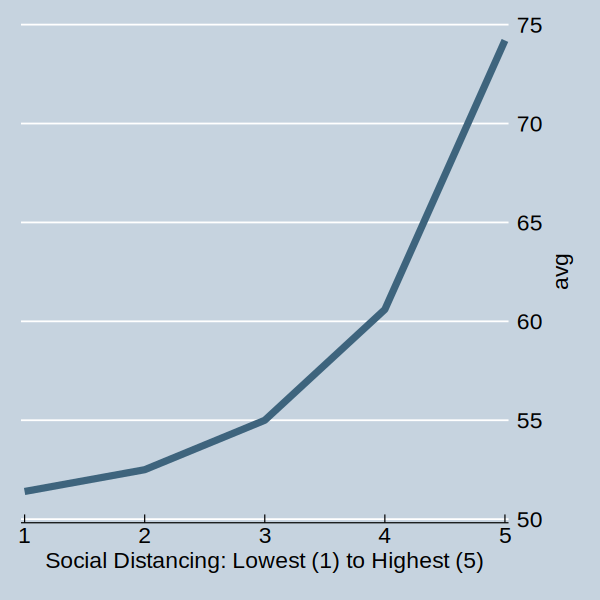

note: pcp_rate has noninteger values

Iteration 0:   log likelihood = -99566.097  
Iteration 1:   log likelihood = -84437.384  
Iteration 2:   log likelihood = -84289.353  
Iteration 3:   log likelihood = -84289.238  
Iteration 4:   log likelihood = -84289.238  

Generalized linear models                         Number of obs   =      2,074
Optimization     : ML                             Residual df     =      2,065
                                                  Scale parameter =          1
Deviance         =   156778.581                   (1/df) Deviance =   75.92183
Pearson          =  1277182.171                   (1/df) Pearson  =   618.4902

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   81.29049
Log likelihood   = -84289.23812                   BIC             =   141007.7

----------------------------------------------------------------

In [222]:
// Comparing Primary Care Physicians per 100,000 population to social distancing
modelrun pcp_rate

Graph above: Comparing **Primary Care Physicians** per 100,000 population to social distancing


---

# Mental Health Providers

For people sequestered at home, mental health providers may play an emerging role. These data are from CMS National Provider Identification (NPI) via [RWJF](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/2020-measures). It is expressed in rates per 100,000 population.

note: mhproviders_rate has noninteger values

Iteration 0:   log likelihood = -130686.97  
Iteration 1:   log likelihood = -128931.92  
Iteration 2:   log likelihood = -128927.48  
Iteration 3:   log likelihood = -128927.48  

Generalized linear models                         Number of obs   =      2,061
Optimization     : ML                             Residual df     =      2,056
                                                  Scale parameter =          1
Deviance         =  244590.2808                   (1/df) Deviance =   118.9641
Pearson          =  316909.3885                   (1/df) Pearson  =   154.1388

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   125.1164
Log likelihood   = -128927.4829                   BIC             =   228901.1

-------------------------------------------------------------------------------
              |      

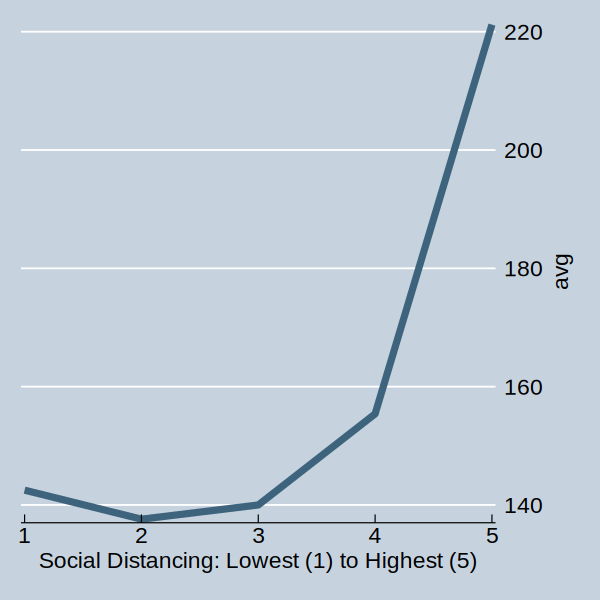

note: mhproviders_rate has noninteger values

Iteration 0:   log likelihood = -476472.32  
Iteration 1:   log likelihood = -349742.53  
Iteration 2:   log likelihood = -348130.98  
Iteration 3:   log likelihood = -348125.75  
Iteration 4:   log likelihood = -348125.75  

Generalized linear models                         Number of obs   =      2,061
Optimization     : ML                             Residual df     =      2,052
                                                  Scale parameter =          1
Deviance         =  682986.8179                   (1/df) Deviance =   332.8396
Pearson          =  10847698.78                   (1/df) Pearson  =   5286.403

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   337.8309
Log likelihood   = -348125.7515                   BIC             =   667328.1

--------------------------------------------------------

In [223]:
// Comparing mental health provider rate to social distancing
modelrun mhproviders_rate

Graph above: Comparing **mental health provider rate per 100k** to social distancing


---
# Health Insurance

Getting hospitalized for Covid-19 is sure to be expensive. After hearing that even some front line nurses in pulmonary infectious disease units in North Carolina do not have health insurance, we wanted to see if there was any association between health insurance status and social distancing. 

note: uninsured_p has noninteger values

Iteration 0:   log likelihood = -6323.7607  
Iteration 1:   log likelihood = -6317.0743  
Iteration 2:   log likelihood = -6317.0733  
Iteration 3:   log likelihood = -6317.0733  

Generalized linear models                         Number of obs   =      2,119
Optimization     : ML                             Residual df     =      2,114
                                                  Scale parameter =          1
Deviance         =  3824.013294                   (1/df) Deviance =   1.808899
Pearson          =  4016.262578                   (1/df) Pearson  =    1.89984

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   5.967035
Log likelihood   = -6317.073317                   BIC             =  -12366.48

------------------------------------------------------------------------------
             |             

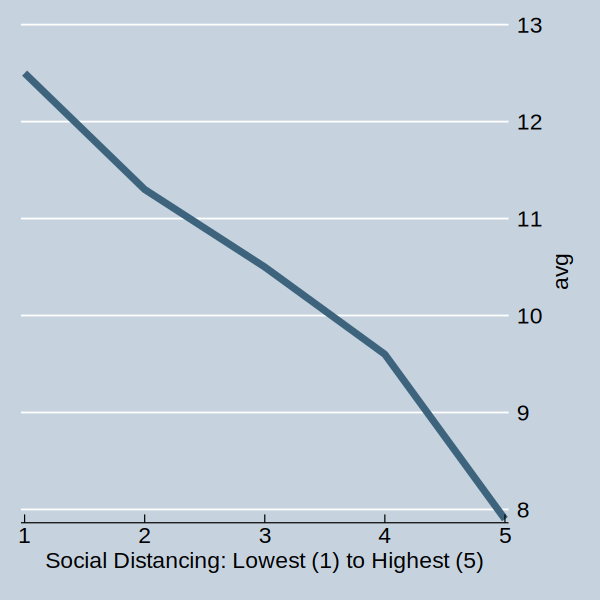

note: uninsured_p has noninteger values

Iteration 0:   log likelihood = -11288.729  
Iteration 1:   log likelihood = -10955.939  
Iteration 2:   log likelihood =  -10954.18  
Iteration 3:   log likelihood = -10954.179  

Generalized linear models                         Number of obs   =      2,119
Optimization     : ML                             Residual df     =      2,110
                                                  Scale parameter =          1
Deviance         =  13098.22554                   (1/df) Deviance =    6.20769
Pearson          =  34739.45887                   (1/df) Pearson  =    16.4642

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =    10.3475
Log likelihood   = -10954.17944                   BIC             =  -3061.631

------------------------------------------------------------------------------
             |             

In [224]:
// Comparing percent uninsured to social distancing
modelrun uninsured_p 

Graph above: Comparing **percent uninsured** to social distancing

Alarmingly, counties with lower social distancing also had more uninsured residents!

---
# Flu Vaccination

We had a hypothesis that counties that were more involved in preventative behaviors would be more likely to self-isolate more thoroughly. To test this, we examined whether earlier flu vaccination rates impacted how much the county was likely to slow down in the current coronavirus outbreak. This is quantified as the percent of annual Medicare enrollees having an annual flu vaccination, as reported by the Robert Wood Johnson Foundation. Since the flu vaccine is free to all Medicare beneficiaries, and this is the elderly age group with the most influenza mortality, this is a convenient metric to test *a priori* how conscientious the population was, on average.




        % Medicare Beneficiaries Getting Flu Vaccine
-------------------------------------------------------------
      Percentiles      Smallest
 1%           18              9
 5%           25              9
10%           30             12       Obs               2,116
25%           37             12       Sum of Wgt.       2,116

50%           43                      Mean           41.90832
                        Largest       Std. Dev.       8.68863
75%           48             62
90%           52             62       Variance        75.4923
95%           54             63       Skewness      -.6507291
99%           57             65       Kurtosis       3.321412

(bin=10, start=9, width=5.6)


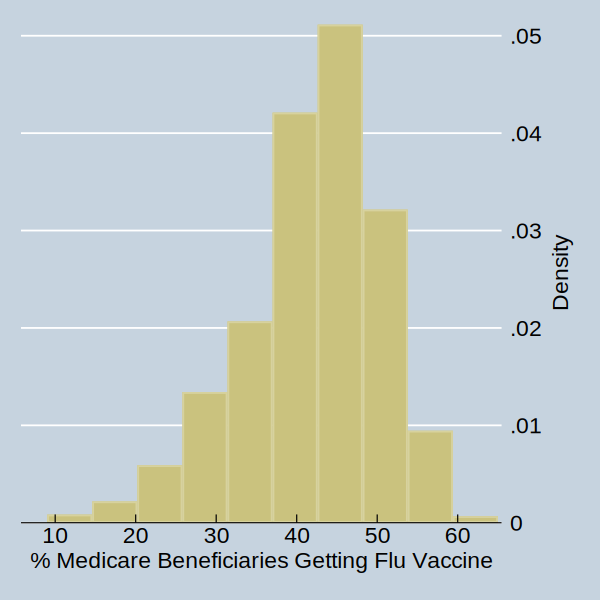

In [225]:
// Basic descriptive on background influenza vaccine
frame change default
summ fluvaccine, d
hist fluvaccine, bin(10)


Iteration 0:   log likelihood = -7874.9638  
Iteration 1:   log likelihood = -7873.6016  
Iteration 2:   log likelihood = -7873.6016  

Generalized linear models                         Number of obs   =      2,116
Optimization     : ML                             Residual df     =      2,111
                                                  Scale parameter =          1
Deviance         =  3999.930341                   (1/df) Deviance =   1.894804
Pearson          =  3708.935402                   (1/df) Pearson  =   1.756957

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   7.446693
Log likelihood   = -7873.601633                   BIC             =  -12164.59

------------------------------------------------------------------------------
             |                 OIM
  fluvaccine |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval

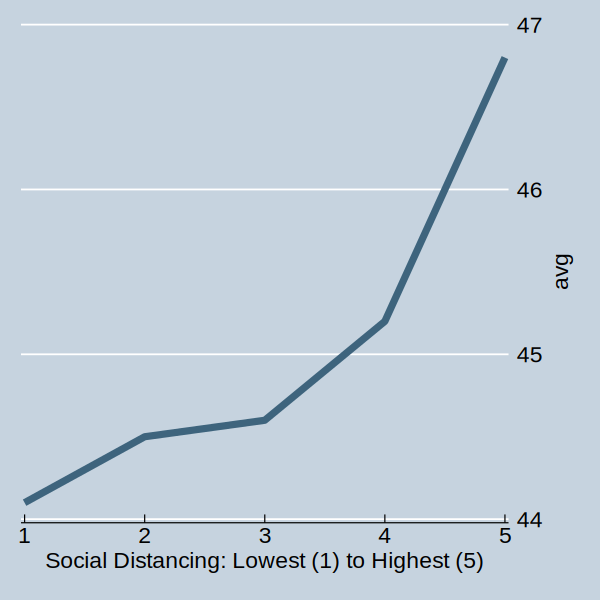


Iteration 0:   log likelihood = -56726.373  
Iteration 1:   log likelihood = -50308.865  
Iteration 2:   log likelihood = -50221.852  
Iteration 3:   log likelihood = -50221.789  
Iteration 4:   log likelihood = -50221.789  

Generalized linear models                         Number of obs   =      2,116
Optimization     : ML                             Residual df     =      2,107
                                                  Scale parameter =          1
Deviance         =  88696.30555                   (1/df) Deviance =   42.09602
Pearson          =  588600.5455                   (1/df) Pearson  =   279.3548

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   47.47712
Log likelihood   = -50221.78924                   BIC             =   72562.41

------------------------------------------------------------------------------
             |        

In [226]:
// Comparing background flu vaccination with current social distancing
modelrun fluvaccine

Grpah above: Comparing background **flu vaccination** with current social distancing

--- 
# Income

There is a trend emerging. So, since the places with more social distancing seem to have more health resources, perhaps there are trends in financial means? Income data are from the American Community Survey 5-year estimates via [RWJF](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/2020-measures).


Iteration 0:   log likelihood = -4605691.1  
Iteration 1:   log likelihood = -4599678.5  
Iteration 2:   log likelihood = -4599678.4  

Generalized linear models                         Number of obs   =      2,119
Optimization     : ML                             Residual df     =      2,114
                                                  Scale parameter =          1
Deviance         =  9171194.269                   (1/df) Deviance =   4338.313
Pearson          =   9773939.94                   (1/df) Pearson  =   4623.434

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   4341.372
Log likelihood   = -4599678.374                   BIC             =    9155004

------------------------------------------------------------------------------
             |                 OIM
    income80 |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval

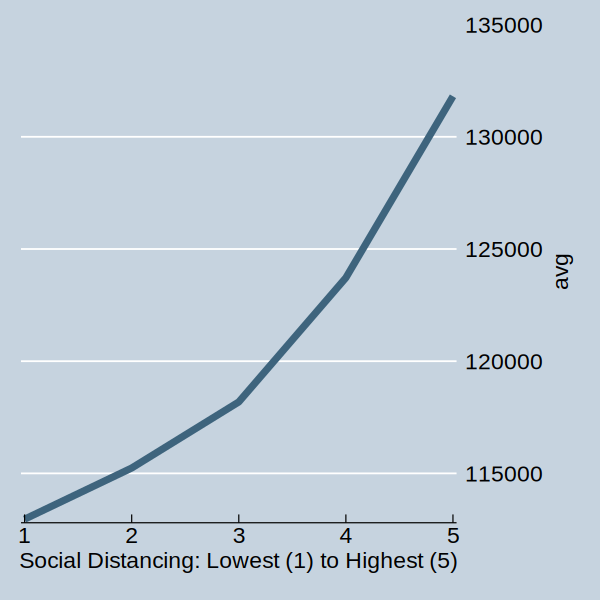


Iteration 0:   log likelihood = -1.387e+09  
Iteration 1:   log likelihood = -6.084e+08  
Iteration 2:   log likelihood = -4.549e+08  
Iteration 3:   log likelihood = -4.529e+08  
Iteration 4:   log likelihood = -4.529e+08  
Iteration 5:   log likelihood = -4.529e+08  

Generalized linear models                         Number of obs   =      2,119
Optimization     : ML                             Residual df     =      2,110
                                                  Scale parameter =          1
Deviance         =  905710761.4                   (1/df) Deviance =   429246.8
Pearson          =  4.36953e+12                   (1/df) Pearson  =   2.07e+09

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =     427437
Log likelihood   = -452869461.9                   BIC             =   9.06e+08

--------------------------------------------------------

In [227]:
// Comparing 80th percentile income to social distancing
modelrun income80

Graph above: Comparing **80th percentile income** to social distancing

---
# Income Inequality

So places with more social distancing tend to be wealthier. What about income inequality? Is this merely a matter of have and have-nots? Or does the overall structure of society tell us something. There are many compelling ways to measure income inequality. We are using the ratio of the 80th percentile of income to the 20th percentile. Loosely interpreted, the closer to 4.0, the less inequality there is. Income data are from the American Community Survey 5-year estimates via [RWJF](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/2020-measures).

note: incomeratio has noninteger values

Iteration 0:   log likelihood = -3690.2851  
Iteration 1:   log likelihood = -3690.2389  
Iteration 2:   log likelihood = -3690.2389  

Generalized linear models                         Number of obs   =      2,119
Optimization     : ML                             Residual df     =      2,114
                                                  Scale parameter =          1
Deviance         =  221.5750592                   (1/df) Deviance =   .1048132
Pearson          =  231.0010538                   (1/df) Pearson  =    .109272

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =    3.48772
Log likelihood   = -3690.238903                   BIC             =  -15968.92

------------------------------------------------------------------------------
             |                 OIM
 incomeratio |        IRR   Std. Err.

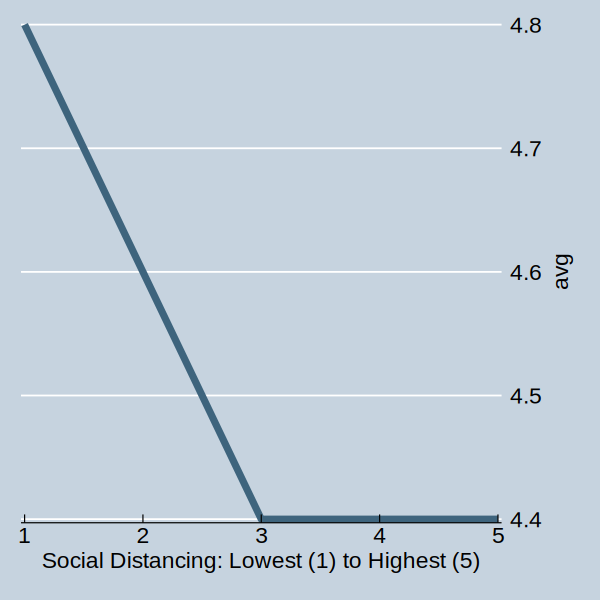

note: incomeratio has noninteger values

Iteration 0:   log likelihood = -4764.8905  
Iteration 1:   log likelihood = -4730.7617  
Iteration 2:   log likelihood = -4730.7013  
Iteration 3:   log likelihood = -4730.7013  

Generalized linear models                         Number of obs   =      2,119
Optimization     : ML                             Residual df     =      2,110
                                                  Scale parameter =          1
Deviance         =  2302.499841                   (1/df) Deviance =   1.091232
Pearson          =  3949.858447                   (1/df) Pearson  =   1.871971

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   4.473526
Log likelihood   = -4730.701294                   BIC             =  -13857.36

------------------------------------------------------------------------------
             |             

In [228]:
// Comparing income inequality to social distancing
modelrun incomeratio

---

# Exploratory analyses




----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(drivea~p)  mean(drivea~p)   sem(drivea~p)
----------+-----------------------------------------------
        1 |            422       81.914518        .2930992
        2 |            414       81.886767        .2089647
        3 |            429        81.00597        .2254435
        4 |            428       80.377373        .2867266
        5 |            426        77.55755        .4115775
----------------------------------------------------------


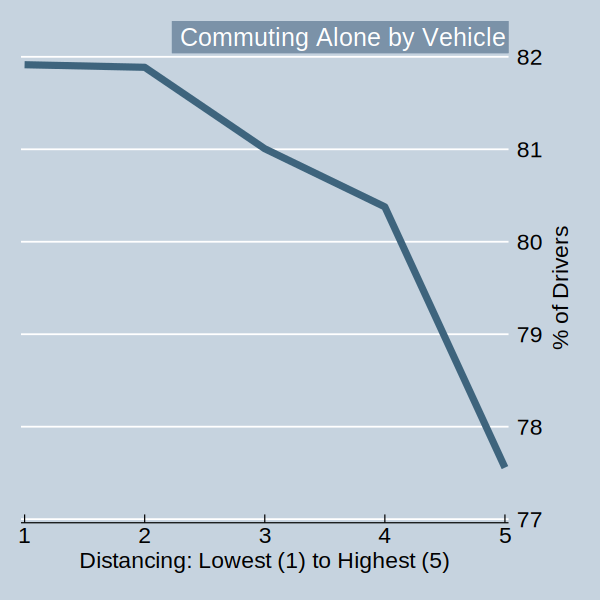

In [229]:
frame change default
foreach var of varlist drivealone_p {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (mean) `var', by(iso5)
                    la var `var' "% of Drivers"
                        line `var' iso5, note("Commuting Alone by Vehicle")  
                            frame change default
                                frame drop `var'
}

---





----------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(rucc)  mean(rucc)   sem(rucc)
----------+-----------------------------------
        1 |        422   5.2985783    .1064284
        2 |        414   4.7487922    .1173818
        3 |        429   4.4055943    .1154999
        4 |        428   3.9252336    .1183915
        5 |        426   3.7042253    .1228568
----------------------------------------------


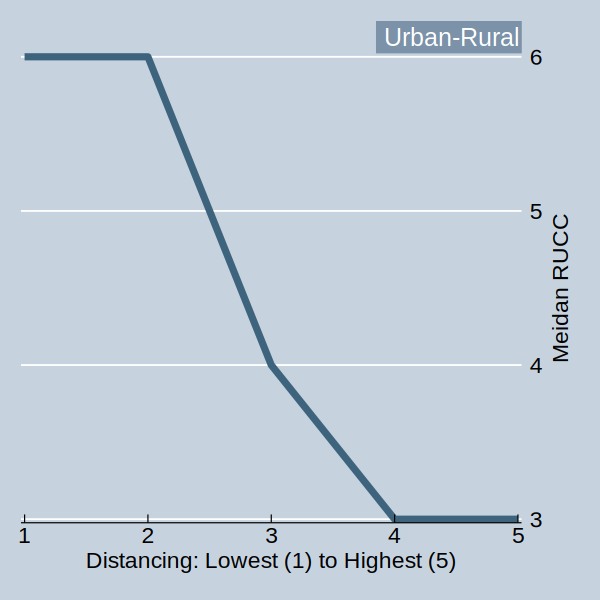

In [230]:
frame change default
foreach var of varlist rucc {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (median) `var', by(iso5)
                    la var `var' "Meidan RUCC"
                        line `var' iso5, note("Urban-Rural")   
                            frame change default
                                frame drop `var'
}




----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(longco~p)  mean(longco~p)   sem(longco~p)
----------+-----------------------------------------------
        1 |            422       27.438152        .6038559
        2 |            414       31.988889        .6042181
        3 |            429       31.908858        .5937674
        4 |            428       33.114252        .5793335
        5 |            426       33.137793        .5559439
----------------------------------------------------------


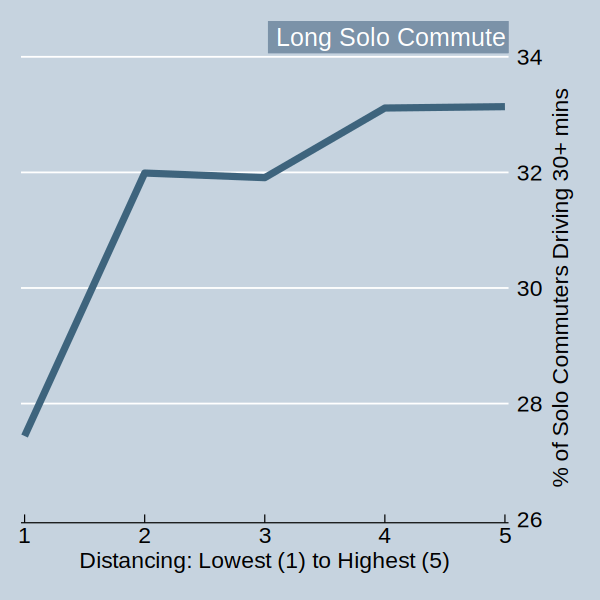

In [231]:
frame change default
foreach var of varlist longcommute_p {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (mean) `var', by(iso5)
                    la var `var' "% of Solo Commuters Driving 30+ mins"
                        line `var' iso5, note("Long Solo Commute")     
                            frame change default
                                frame drop `var'
}

---
# Google location context

note: food has noninteger values

Iteration 0:   log likelihood = -4223.6695  
Iteration 1:   log likelihood = -4223.6202  
Iteration 2:   log likelihood = -4223.6202  

Generalized linear models                         Number of obs   =      2,105
Optimization     : ML                             Residual df     =      2,100
                                                  Scale parameter =          1
Deviance         =  294.3668977                   (1/df) Deviance =   .1401747
Pearson          =  270.4605832                   (1/df) Pearson  =   .1287908

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   4.017691
Log likelihood   = -4223.620212                   BIC             =  -15774.98

------------------------------------------------------------------------------
             |                 OIM
        food |        IRR   Std. Err.      z

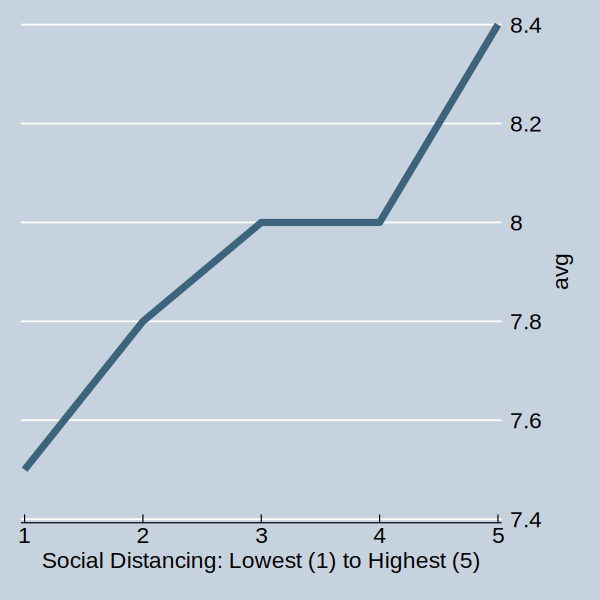

note: food has noninteger values

Iteration 0:   log likelihood = -7437.1443  
Iteration 1:   log likelihood = -7293.9643  
Iteration 2:   log likelihood = -7293.7936  
Iteration 3:   log likelihood = -7293.7936  

Generalized linear models                         Number of obs   =      2,105
Optimization     : ML                             Residual df     =      2,096
                                                  Scale parameter =          1
Deviance         =  6434.713659                   (1/df) Deviance =   3.069997
Pearson          =  14720.28207                   (1/df) Pearson  =   7.023035

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   6.938521
Log likelihood   = -7293.793593                   BIC             =  -9604.027

------------------------------------------------------------------------------
             |                 OIM

In [233]:
modelrun food

note: physicalinactive has noninteger values

Iteration 0:   log likelihood = -6375.9361  
Iteration 1:   log likelihood =  -6375.105  
Iteration 2:   log likelihood =  -6375.105  

Generalized linear models                         Number of obs   =      2,119
Optimization     : ML                             Residual df     =      2,114
                                                  Scale parameter =          1
Deviance         =  2017.877614                   (1/df) Deviance =   .9545306
Pearson          =  1963.233986                   (1/df) Pearson  =   .9286821

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   6.021807
Log likelihood   =  -6375.10499                   BIC             =  -14172.61

-------------------------------------------------------------------------------
              |                 OIM
physicalina~e |        IRR   S

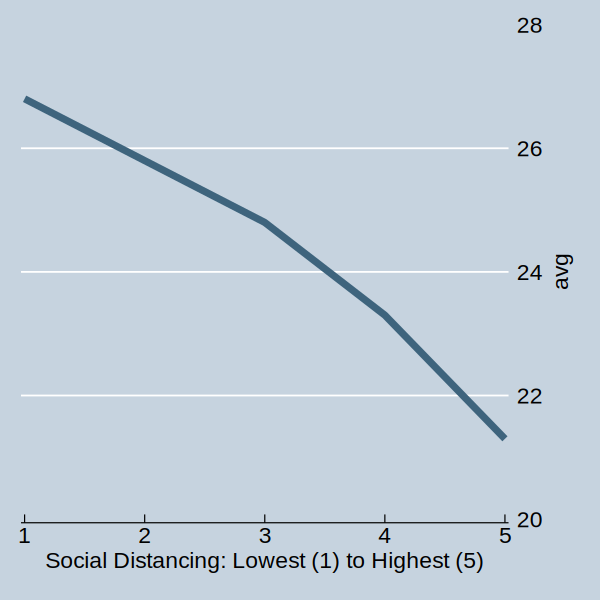

note: physicalinactive has noninteger values

Iteration 0:   log likelihood = -25844.792  
Iteration 1:   log likelihood = -23902.819  
Iteration 2:   log likelihood = -23868.066  
Iteration 3:   log likelihood = -23868.023  
Iteration 4:   log likelihood = -23868.023  

Generalized linear models                         Number of obs   =      2,119
Optimization     : ML                             Residual df     =      2,110
                                                  Scale parameter =          1
Deviance         =  37003.71395                   (1/df) Deviance =   17.53731
Pearson          =  171367.3644                   (1/df) Pearson  =   81.21676

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   22.53612
Log likelihood   = -23868.02316                   BIC             =   20843.86

--------------------------------------------------------

In [234]:
modelrun physicalinactive

note: exercise has noninteger values

Iteration 0:   log likelihood = -14189.945  
Iteration 1:   log likelihood = -14176.306  
Iteration 2:   log likelihood = -14176.306  

Generalized linear models                         Number of obs   =      2,119
Optimization     : ML                             Residual df     =      2,114
                                                  Scale parameter =          1
Deviance         =  15772.40018                   (1/df) Deviance =   7.460927
Pearson          =  13420.24855                   (1/df) Pearson  =   6.348273

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =    13.3849
Log likelihood   = -14176.30551                   BIC             =  -418.0907

------------------------------------------------------------------------------
             |                 OIM
    exercise |        IRR   Std. Err.   

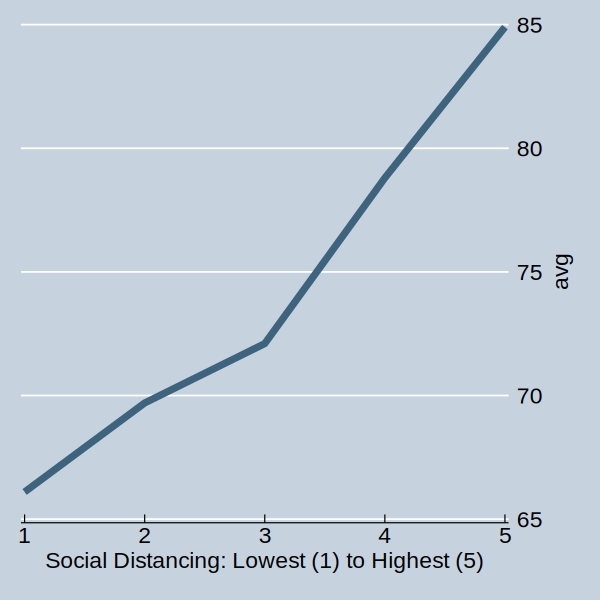

note: exercise has noninteger values

Iteration 0:   log likelihood = -117817.49  
Iteration 1:   log likelihood = -99383.063  
Iteration 2:   log likelihood = -99086.942  
Iteration 3:   log likelihood = -99086.577  
Iteration 4:   log likelihood = -99086.577  

Generalized linear models                         Number of obs   =      2,119
Optimization     : ML                             Residual df     =      2,110
                                                  Scale parameter =          1
Deviance         =  185592.9425                   (1/df) Deviance =   87.95874
Pearson          =   1699650.58                   (1/df) Pearson  =   805.5216

Variance function: V(u) = u                       [Poisson]
Link function    : g(u) = ln(u)                   [Log]

                                                  AIC             =   93.53051
Log likelihood   = -99086.57666                   BIC             =   169433.1

----------------------------------------------------------------

In [236]:
modelrun exercise


In [238]:
modelrun q_subunit_work

variable levels1 already defined


r(110);
